In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [4]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [5]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [6]:

im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [9]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [10]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2024)             

In [11]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 12s - loss: 2.9981 - accuracy: 0.0395 - val_loss: 3.0427 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 7s - loss: 3.0064 - accuracy: 0.0570 - val_loss: 3.0464 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 7s - loss: 3.0102 - accuracy: 0.0658 - val_loss: 3.0417 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 7s - loss: 2.9959 - accuracy: 0.0439 - val_loss: 3.0375 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 10s - loss: 2.9944 - accuracy: 0.0526 - val_loss: 3.0331 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 9s - loss: 2.9975 - accuracy: 0.0570 - val_loss: 3.0305 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 11s - loss: 2.9960 - accuracy: 0.0614 - val_loss: 3.0283 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 12s - loss: 2.9808 - accuracy: 0.0965 - val_loss: 3.0260 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 10s - loss: 2.9877 - accuracy: 0.0351 - val_loss: 3.0236 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 11s - loss: 2.9471 - accuracy: 0.1009 - val_loss: 3.0212 - val_accu

Epoch 84/250
1/1 - 9s - loss: 0.4916 - accuracy: 0.8684 - val_loss: 0.1531 - val_accuracy: 1.0000
Epoch 85/250
1/1 - 8s - loss: 0.4589 - accuracy: 0.8728 - val_loss: 0.1336 - val_accuracy: 1.0000
Epoch 86/250
1/1 - 8s - loss: 0.5147 - accuracy: 0.8640 - val_loss: 0.1289 - val_accuracy: 1.0000
Epoch 87/250
1/1 - 10s - loss: 0.4124 - accuracy: 0.8947 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 88/250
1/1 - 9s - loss: 0.4375 - accuracy: 0.8684 - val_loss: 0.1162 - val_accuracy: 1.0000
Epoch 89/250
1/1 - 8s - loss: 0.3803 - accuracy: 0.8947 - val_loss: 0.0985 - val_accuracy: 1.0000
Epoch 90/250
1/1 - 8s - loss: 0.3249 - accuracy: 0.9386 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 91/250
1/1 - 8s - loss: 0.3862 - accuracy: 0.8947 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 92/250
1/1 - 8s - loss: 0.3752 - accuracy: 0.8947 - val_loss: 0.0913 - val_accuracy: 1.0000
Epoch 93/250
1/1 - 8s - loss: 0.3222 - accuracy: 0.9167 - val_loss: 0.0960 - val_accuracy: 1.0000
Epoch 94/250
1/1 - 

Epoch 167/250
1/1 - 8s - loss: 0.0442 - accuracy: 0.9912 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 168/250
1/1 - 7s - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 169/250
1/1 - 7s - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 170/250
1/1 - 7s - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 171/250
1/1 - 7s - loss: 0.0363 - accuracy: 0.9956 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 172/250
1/1 - 7s - loss: 0.0368 - accuracy: 0.9912 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 173/250
1/1 - 7s - loss: 0.0389 - accuracy: 0.9956 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 174/250
1/1 - 7s - loss: 0.0281 - accuracy: 0.9956 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 175/250
1/1 - 7s - loss: 0.0308 - accuracy: 0.9956 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 176/250
1/1 - 7s - loss: 0.0308 - accuracy: 0.9956 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 177/

Epoch 248/250
1/1 - 7s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 249/250
1/1 - 7s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 250/250
1/1 - 7s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


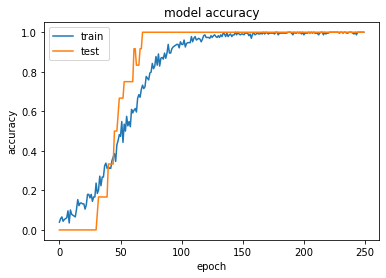

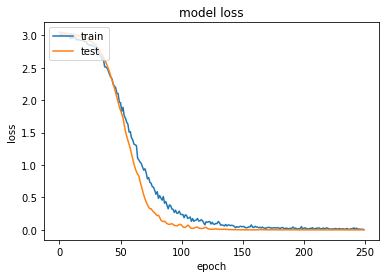

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()